# Gravity disturbance inside a prism

This code illustrates how to compute the gravity disturbance produced by a homogeneous rectangular prism. We presume that the gravity disturbance can be approximated by the vertical componen of the gravitational attraction produced by the prism.

### Things we have to import

In [1]:
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import prism
import plot_functions as plf

### Model

In [2]:
# Create a model formed by a single prism
model = np.array([[-500, 500, -700, 800, 10, 1010]])

density = np.array([2000]) # 2000 kg/m³ = 2 g/cm³

In [3]:
# Define the coordinate z of the pplane crossing the model
z_cross = 200

In [4]:
# Split the previous model into two parts
# The prism above and below the plane z_cros are called 
# model_up and model_down, respectively
model_up = np.array([[-500, 500, -700, 800, 10, z_cross]])
model_down = np.array([[-500, 500, -700, 800, z_cross, 1010]])

In [10]:
# Create a mirror of model_up
model_up_mirror = np.array([[-500, 500, -700, 800, z_cross, z_cross + (z_cross - 10)]])

### Points were we compute the synthetic data

In [5]:
# number of points along x and y
shape = (100, 100)

# minimum x, maximum x, minimum y and maximum y
area = [-5000, 5000, -4000, 6000]

# coordinates 
yp = np.linspace(area[0], area[1], shape[0])
xp = np.linspace(area[2], area[3], shape[1])
yp, xp = np.meshgrid(yp, xp)

yp = np.ravel(yp)
xp = np.ravel(xp)
zp = np.zeros_like(yp) + z_cross

coordinates = np.vstack([yp, xp, zp])

### Synthetic gravity disturbance (in mGal)

In [6]:
# Compute the vertical component of acceleration
gz = prism.grav(coordinates=coordinates, 
                prisms=model, 
                density=density, 
                field='g_z')

In [7]:
# Compute the effect produce by the two models
gz_up = prism.grav(coordinates=coordinates, 
                   prisms=model_up, 
                   density=density, 
                   field='g_z')
gz_down = prism.grav(coordinates=coordinates, 
                     prisms=model_down, 
                     density=density, 
                     field='g_z')

In [11]:
# Compute the effect produce by the two models
gz_up_mirror = prism.grav(coordinates=coordinates, 
                          prisms=model_up_mirror, 
                          density=-density, 
                          field='g_z')

### Plot the computed gravity disturbance

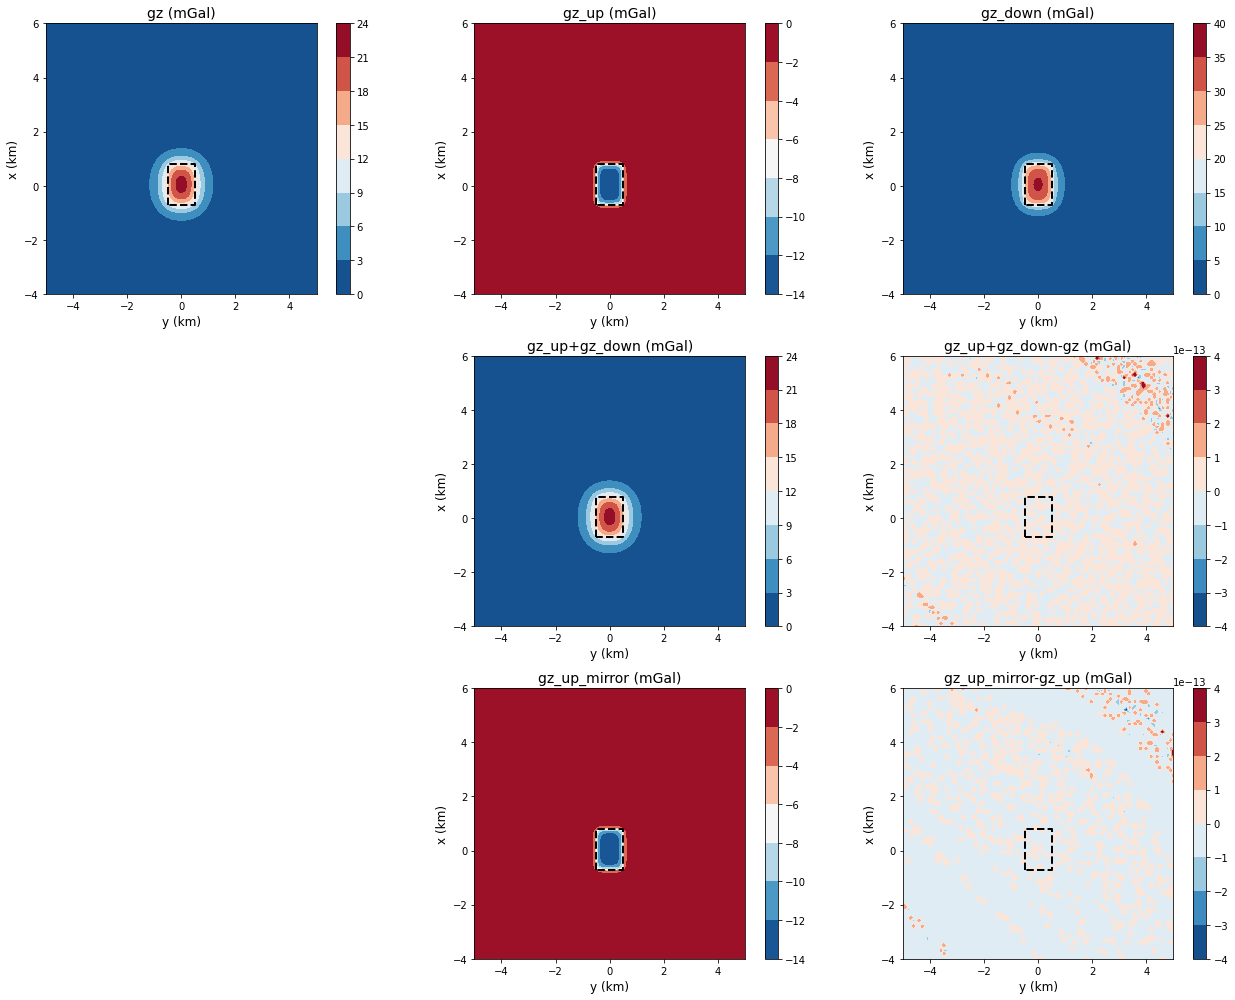

In [13]:
fields = [gz, gz_up, gz_down, 
          gz_up+gz_down, gz_up+gz_down-gz, 
          gz_up_mirror, gz_up_mirror - gz_up]
windows = [1, 2, 3, 5, 6, 8, 9]
titles = ['gz (mGal)', 'gz_up (mGal)', 'gz_down (mGal)', 
          'gz_up+gz_down (mGal)', 'gz_up+gz_down-gz (mGal)',
          'gz_up_mirror (mGal)', 'gz_up_mirror-gz_up (mGal)']

plt.figure(figsize=(18,14))

for w, window in enumerate(windows):

    plt.subplot(3,3,window)
    plt.title(titles[w], fontsize=14)
    plt.axis('scaled')
    plt.contourf(yp.reshape(shape)*0.001, 
                 xp.reshape(shape)*0.001, 
                 fields[w].reshape(shape), cmap='RdBu_r')
    plt.colorbar()
    plf.model_boundaries(model, m2km=True)
    plt.xlim(0.001*area[0], 0.001*area[1])
    plt.ylim(0.001*area[2], 0.001*area[3])
    plt.xlabel('y (km)', fontsize=12)
    plt.ylabel('x (km)', fontsize=12)

plt.tight_layout()

plt.show()